In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import math
%matplotlib inline

empresa = pd.read_csv("C:/Users/Natalia/Desktop/Summer2020/Segundo Projeto/clientes.csv")

In [2]:
#sb.pairplot(empresa)

In [3]:
empresa

,ID,Prod1,Prod2,Prod3,Prod4,Prod5,Prod6,Prod7,Prod8,Prod9,Prod10
0,1,21,80,37,27,5,38,55,7,4,54
1,2,23,83,37,30,12,32,61,10,9,48
2,3,22,96,35,28,3,32,64,6,4,50
3,4,71,58,34,26,6,88,13,1,0,20
4,5,22,84,32,29,14,31,52,19,4,48
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,74,78,31,29,15,85,17,3,1,19
9996,9997,23,98,35,26,3,40,62,9,7,60
9997,9998,22,74,33,26,5,33,63,17,10,60
9998,9999,72,84,35,30,9,83,20,3,2,2


In [4]:
empresa = empresa.drop(columns="ID")

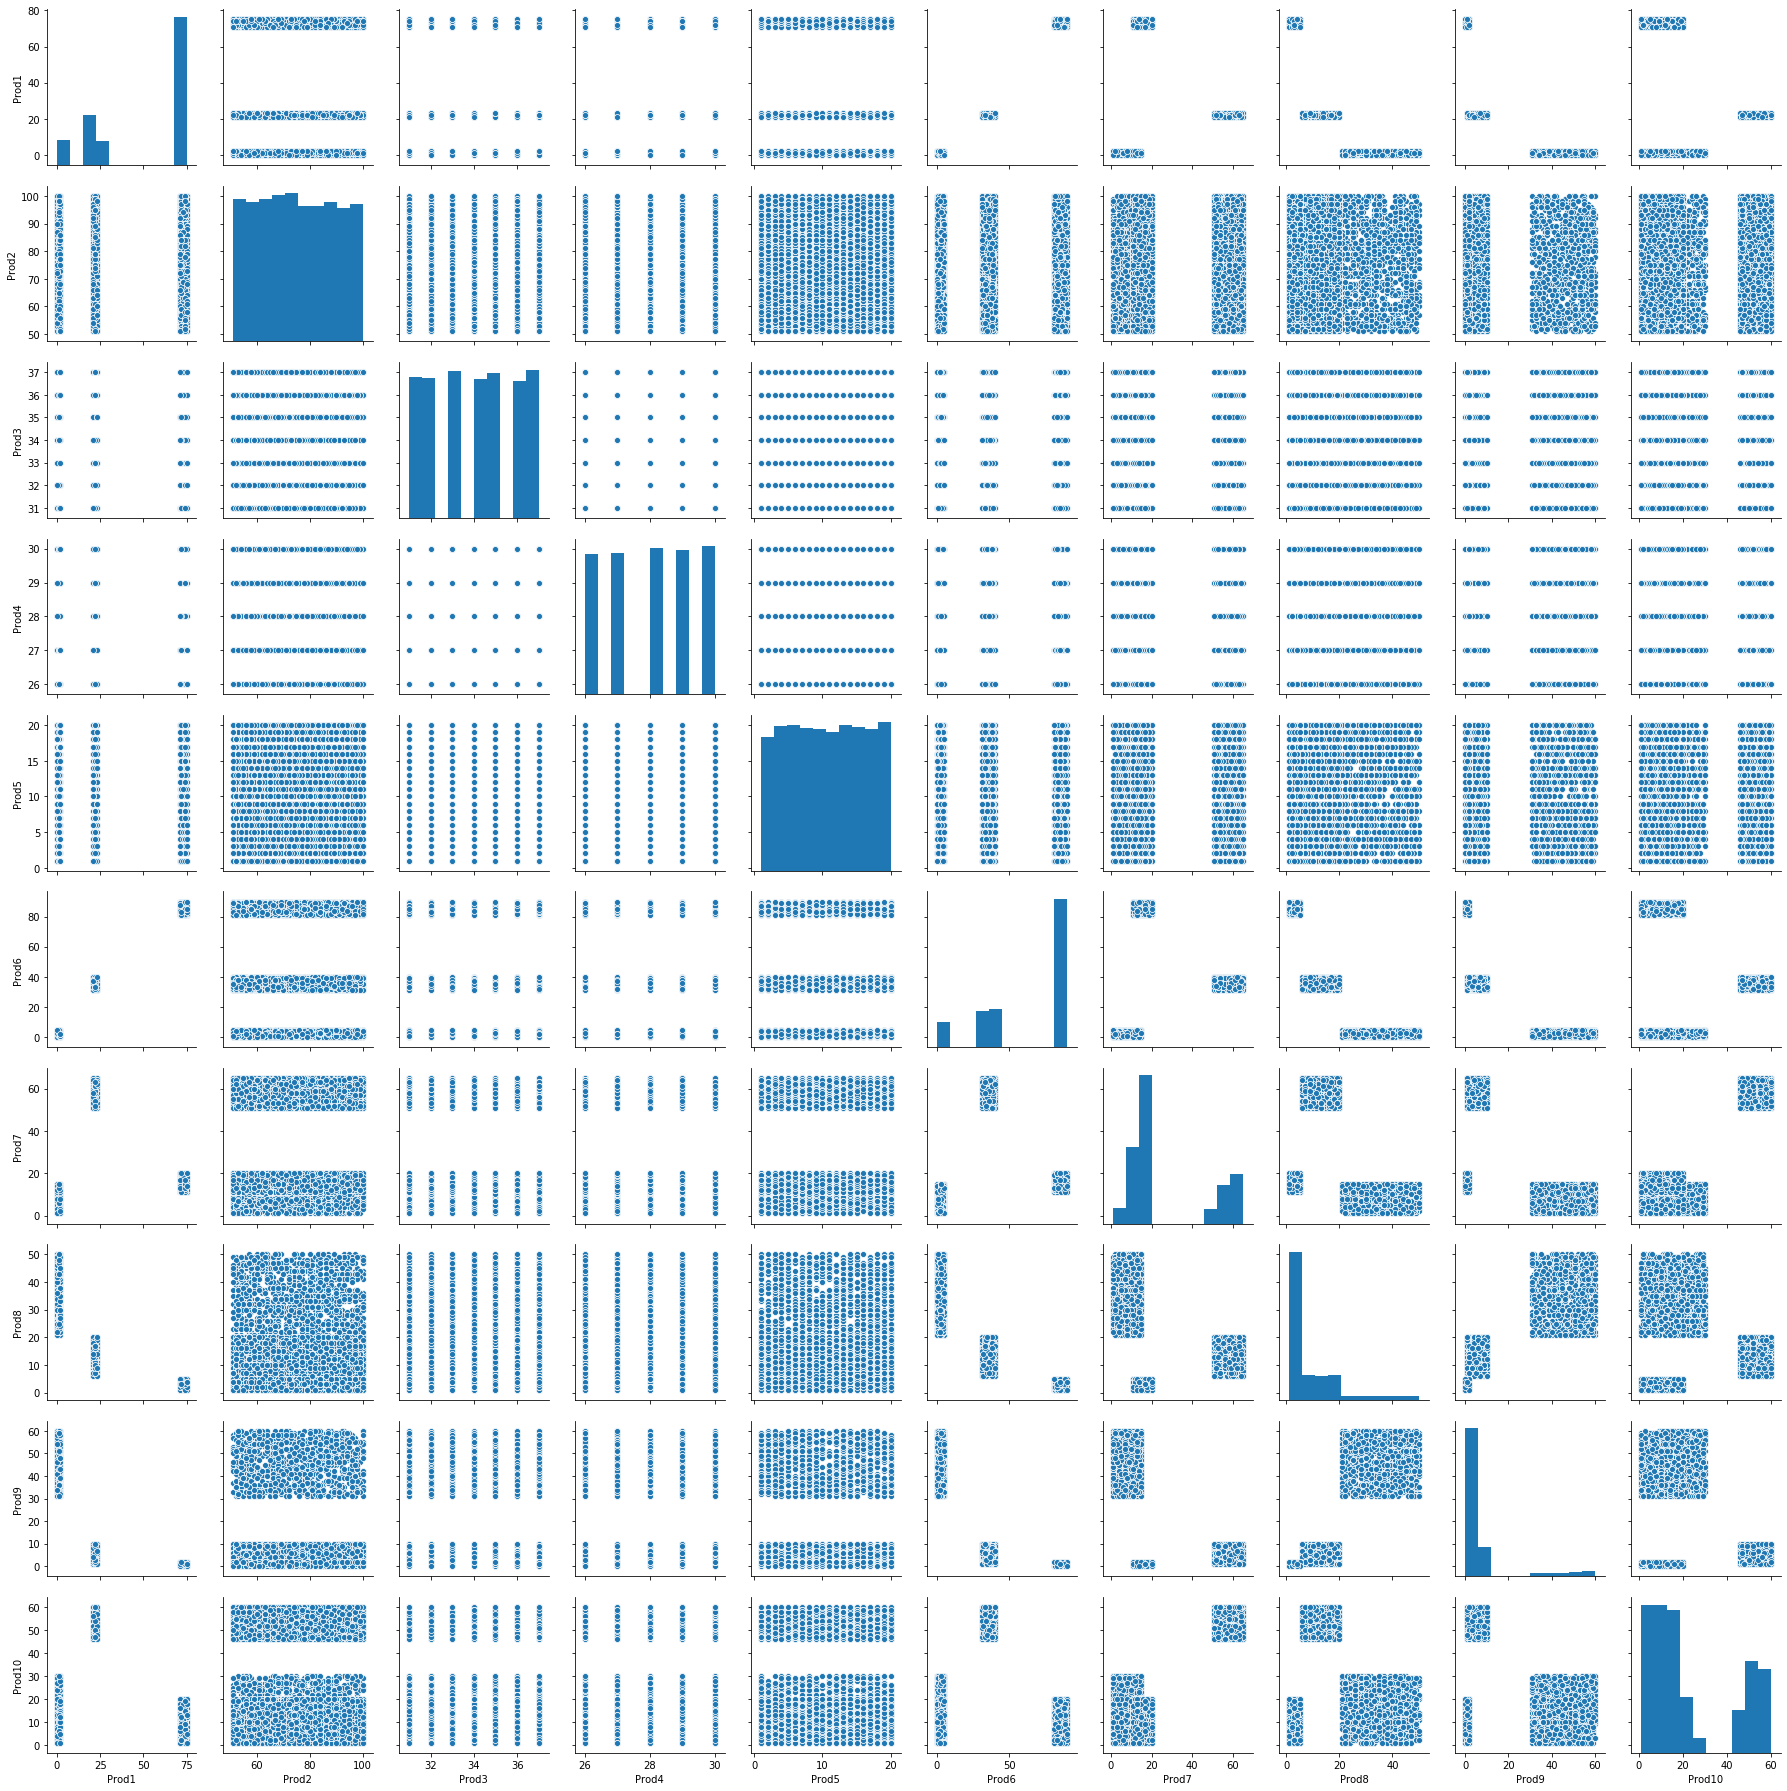

In [5]:
sb.pairplot(empresa)

In [6]:
mms=MinMaxScaler() #escalando o dataset
mms.fit(empresa)
data_transformed=mms.transform(empresa)

In [7]:
data_transformed = pd.DataFrame(data_transformed, columns=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'])
data_transformed #convertendo em um dataframe

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,0.280000,0.591837,1.000000,0.25,0.210526,0.422222,0.843750,0.122449,0.066667,0.898305
1,0.306667,0.653061,1.000000,1.00,0.578947,0.355556,0.937500,0.183673,0.150000,0.796610
2,0.293333,0.918367,0.666667,0.50,0.105263,0.355556,0.984375,0.102041,0.066667,0.830508
3,0.946667,0.142857,0.500000,0.00,0.263158,0.977778,0.187500,0.000000,0.000000,0.322034
4,0.293333,0.673469,0.166667,0.75,0.684211,0.344444,0.796875,0.367347,0.066667,0.796610
...,...,...,...,...,...,...,...,...,...,...
9995,0.986667,0.551020,0.000000,0.75,0.736842,0.944444,0.250000,0.040816,0.016667,0.305085
9996,0.306667,0.959184,0.666667,0.00,0.105263,0.444444,0.953125,0.163265,0.116667,1.000000
9997,0.293333,0.469388,0.333333,0.00,0.210526,0.366667,0.968750,0.326531,0.166667,1.000000
9998,0.960000,0.673469,0.666667,1.00,0.421053,0.922222,0.296875,0.040816,0.033333,0.016949


In [8]:
def calculate_wcss(data_transformed):
    So = [] #aplicando elbow point
    n = range(1,10)
    for N in n:
        km = KMeans(n_clusters=N)
        km = km.fit(data_transformed)
        So.append(km.inertia_)
    return So

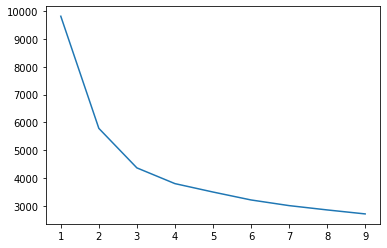

In [9]:
So = calculate_wcss(data_transformed)
plt.plot(range(1,10),So) #plotando o gráfico
plt.show()

In [10]:
def optimal_number_of_clusters(So): #calculando distância entre cada ponto em relação a reta que passa por a1 e a9
    x1, y1 = 2, So[0]
    x2, y2 = 20, So[len(So)-1]

    distances = []
    for i in range(len(So)):
        x0 = i+2
        y0 = So[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [11]:
So = calculate_wcss(data_transformed)

# calculando a quantidade ótima de clusters
k_ideal = optimal_number_of_clusters(So)
k_ideal

5

In [12]:
data_transformed

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,0.280000,0.591837,1.000000,0.25,0.210526,0.422222,0.843750,0.122449,0.066667,0.898305
1,0.306667,0.653061,1.000000,1.00,0.578947,0.355556,0.937500,0.183673,0.150000,0.796610
2,0.293333,0.918367,0.666667,0.50,0.105263,0.355556,0.984375,0.102041,0.066667,0.830508
3,0.946667,0.142857,0.500000,0.00,0.263158,0.977778,0.187500,0.000000,0.000000,0.322034
4,0.293333,0.673469,0.166667,0.75,0.684211,0.344444,0.796875,0.367347,0.066667,0.796610
...,...,...,...,...,...,...,...,...,...,...
9995,0.986667,0.551020,0.000000,0.75,0.736842,0.944444,0.250000,0.040816,0.016667,0.305085
9996,0.306667,0.959184,0.666667,0.00,0.105263,0.444444,0.953125,0.163265,0.116667,1.000000
9997,0.293333,0.469388,0.333333,0.00,0.210526,0.366667,0.968750,0.326531,0.166667,1.000000
9998,0.960000,0.673469,0.666667,1.00,0.421053,0.922222,0.296875,0.040816,0.033333,0.016949


In [13]:
X = np.array(data_transformed) #passando o dataset pre-processado para o array X

In [14]:
kmeans = KMeans(n_clusters=5,random_state=0) #executando kmeans
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [15]:
X

array([[0.28      , 0.59183673, 1.        , ..., 0.12244898, 0.06666667,
        0.89830508],
       [0.30666667, 0.65306122, 1.        , ..., 0.18367347, 0.15      ,
        0.79661017],
       [0.29333333, 0.91836735, 0.66666667, ..., 0.10204082, 0.06666667,
        0.83050847],
       ...,
       [0.29333333, 0.46938776, 0.33333333, ..., 0.32653061, 0.16666667,
        1.        ],
       [0.96      , 0.67346939, 0.66666667, ..., 0.04081633, 0.03333333,
        0.01694915],
       [1.        , 0.14285714, 1.        , ..., 0.06122449, 0.01666667,
        0.20338983]])

In [16]:
clusters = kmeans.cluster_centers_ #clusters
clusters

array([[0.97276547, 0.49314513, 0.85093697, 0.31274844, 0.50431872,
        0.95012304, 0.22656694, 0.04088586, 0.01694113, 0.1588177 ],
       [0.29324   , 0.49795238, 0.49355556, 0.50825   , 0.5015614 ,
        0.39522593, 0.8923125 , 0.24510204, 0.09112222, 0.87972316],
       [0.01318667, 0.49026531, 0.49283333, 0.523     , 0.49768421,
        0.02885556, 0.110125  , 0.70126531, 0.76176667, 0.24159322],
       [0.97303514, 0.49336339, 0.47307166, 0.88817891, 0.50474429,
        0.94986561, 0.22679427, 0.04165464, 0.01628632, 0.16008478],
       [0.9738151 , 0.48956673, 0.2516276 , 0.25219727, 0.50719572,
        0.94970703, 0.22520447, 0.04150391, 0.01630046, 0.15987487]])

In [17]:
y_km = kmeans.fit_predict(X)
y_km

array([1, 1, 1, ..., 1, 3, 0], dtype=int32)

/home/gabriel/analise/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


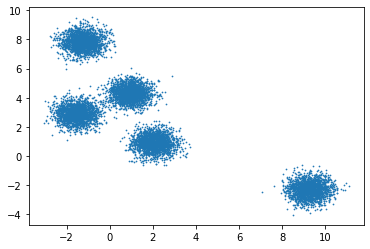

In [18]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=10000, centers=5,
                       cluster_std=0.50, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=0.50)

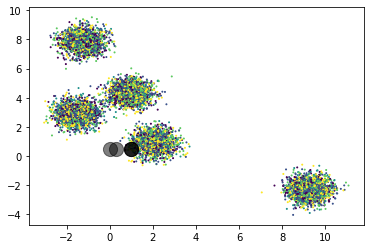

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y_km, s=1, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [20]:
data_transformed['k-classes'] = kmeans.labels_

In [21]:
sb.pairplot(data_transformed,hue="k-classes",diag_kind='hist')